In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
for dirname, _, filenames in os.walk('../../bigquery-geotab-intersection-congestion'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../../bigquery-geotab-intersection-congestion\BigQuery-Dataset-Access.md
../../bigquery-geotab-intersection-congestion\sample_submission.csv
../../bigquery-geotab-intersection-congestion\submission_metric_map
../../bigquery-geotab-intersection-congestion\submission_metric_map.json
../../bigquery-geotab-intersection-congestion\test.csv
../../bigquery-geotab-intersection-congestion\train.csv


In [3]:
df_train = pd.read_csv('../../bigquery-geotab-intersection-congestion/train.csv')
df_test = pd.read_csv('../../bigquery-geotab-intersection-congestion/test.csv')

In [4]:
df_train.head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City
0,1921357,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
1,1921358,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
2,1921359,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
3,1921360,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
4,1921361,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856387 entries, 0 to 856386
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   RowId                    856387 non-null  int64  
 1   IntersectionId           856387 non-null  int64  
 2   Latitude                 856387 non-null  float64
 3   Longitude                856387 non-null  float64
 4   EntryStreetName          848239 non-null  object 
 5   ExitStreetName           850100 non-null  object 
 6   EntryHeading             856387 non-null  object 
 7   ExitHeading              856387 non-null  object 
 8   Hour                     856387 non-null  int64  
 9   Weekend                  856387 non-null  int64  
 10  Month                    856387 non-null  int64  
 11  Path                     856387 non-null  object 
 12  TotalTimeStopped_p20     856387 non-null  float64
 13  TotalTimeStopped_p40     856387 non-null  float64
 14  Tota

In [6]:
df_train.dropna()
df_test.dropna()

summary_table = df_train.describe()
summary_table

,RowId,IntersectionId,Latitude,Longitude,Hour,Weekend,Month,TotalTimeStopped_p20,TotalTimeStopped_p40,TotalTimeStopped_p50,...,TimeFromFirstStop_p20,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80
count,8.563870e+05,856387.000000,856387.000000,856387.000000,856387.000000,856387.000000,856387.000000,856387.000000,856387.000000,856387.000000,...,856387.000000,856387.000000,856387.000000,856387.000000,856387.000000,856387.000000,856387.000000,856387.000000,856387.00000,856387.000000
mean,2.349550e+06,833.283384,39.618965,-77.916488,12.431234,0.277880,9.104808,1.755596,5.403592,7.722655,...,3.181096,9.162174,12.722165,18.926085,34.201656,6.765856,20.285128,28.837113,44.27231,83.991313
std,2.472178e+05,654.308913,2.935437,5.952959,6.071843,0.447954,1.991094,7.146549,12.981674,15.685910,...,11.835994,20.446568,24.219271,29.851797,41.130668,29.535968,59.202108,75.217343,102.03225,160.709797
min,1.921357e+06,0.000000,33.649973,-87.862288,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,2.135454e+06,291.000000,39.936739,-84.387607,8.000000,0.000000,7.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,2.349550e+06,679.000000,39.982974,-75.175055,13.000000,0.000000,9.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.00000,60.400000
75%,2.563646e+06,1264.000000,41.910047,-75.100495,17.000000,1.000000,11.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,22.000000,31.000000,49.000000,0.000000,0.000000,53.100000,64.20000,85.950000
max,2.777743e+06,2875.000000,42.381782,-71.025550,23.000000,1.000000,12.000000,298.000000,375.000000,375.000000,...,337.000000,356.000000,356.000000,357.000000,359.000000,1901.900000,2844.400000,2851.100000,3282.40000,4079.200000


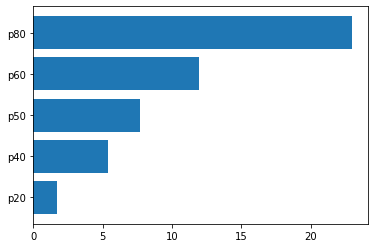

In [7]:
names = ['TotalTimeStopped_p20', 
         'TotalTimeStopped_p40', 
         'TotalTimeStopped_p50', 
         'TotalTimeStopped_p60',
         'TotalTimeStopped_p80']
x = [summary_table[name]['mean'] for name in names]
labels = [name[-3:] for name in names]

plt.barh(labels, x)

plt.show()

In [8]:
numerical_cols = [col for col in summary_table.columns]
categorical_cols = [col for col in df_train.columns if col not in numerical_cols]

for col in categorical_cols:
    print(col)

EntryStreetName
ExitStreetName
EntryHeading
ExitHeading
Path
City


In [9]:
# Dummy variables

# Training
df_train = pd.concat([df_train, pd.get_dummies(df_train['EntryHeading'],
                                              prefix='entry')],
                    axis=1)
df_train = pd.concat([df_train, pd.get_dummies(df_train['ExitHeading'],
                                              prefix='exit')],
                    axis=1)
df_train = pd.concat([df_train, pd.get_dummies(df_train['City'],
                                              prefix='c')],
                    axis=1)
# Test
df_test = pd.concat([df_test, pd.get_dummies(df_test['EntryHeading'],
                                              prefix='entry')],
                    axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test['ExitHeading'],
                                              prefix='exit')],
                    axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test['City'],
                                              prefix='c')],
                    axis=1)

In [10]:
numerical_cols = [col for col in summary_table.columns]
categorical_cols = [col for col in df_train.columns if col not in numerical_cols]

for col in categorical_cols:
    print(col)

EntryStreetName
ExitStreetName
EntryHeading
ExitHeading
Path
City
entry_E
entry_N
entry_NE
entry_NW
entry_S
entry_SE
entry_SW
entry_W
exit_E
exit_N
exit_NE
exit_NW
exit_S
exit_SE
exit_SW
exit_W
c_Atlanta
c_Boston
c_Chicago
c_Philadelphia


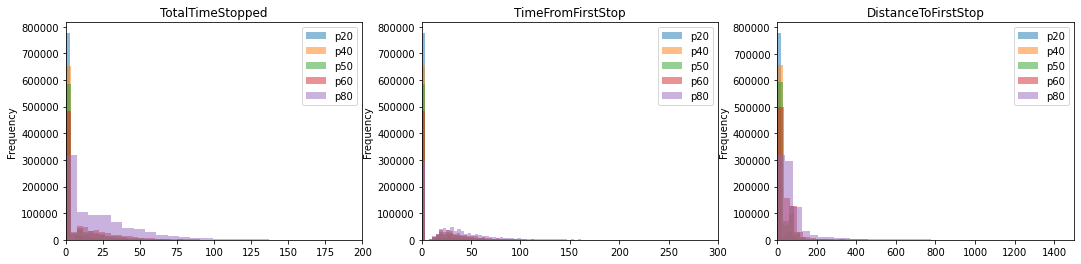

In [11]:
targets = ['TotalTimeStopped', 'TimeFromFirstStop', 'DistanceToFirstStop']
percentiles = ['p20', 'p40', 'p50', 'p60', 'p80']

plt.figure(figsize=(16, 4))
kwargs = dict(alpha=0.5, bins=100)
xlims = [200, 300, 1500]

i = 1
for target in targets:
    plt.subplot(int('13' + str(i)), label=target)
    for percentile in percentiles:
        plt.hist(df_train[target+'_'+percentile], **kwargs, label=percentile)
    plt.gca().set(title=target, ylabel='Frequency')
    plt.xlim(0, xlims[i-1])
    plt.legend()
    i += 1
    
plt.subplots_adjust(right = 1)
plt.show()

In [12]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor as MOR

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [13]:
X = df_train[["IntersectionId","Hour","Weekend","Month",'entry_E', 'entry_N', 'entry_NE', 
              'entry_NW', 'entry_S', 'entry_SE', 'entry_SW', 'entry_W', 'exit_E', 'exit_N', 
              'exit_NE', 'exit_NW', 'exit_S', 'exit_SE', 'exit_SW', 'exit_W', 
              'c_Atlanta', 'c_Boston', 'c_Chicago', 'c_Philadelphia']]
y = pd.concat([df_train[f'{targets[0]}_{perc}'] for perc in percentiles], axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2)

X_test = df_test[["IntersectionId","Hour","Weekend","Month",'entry_E', 'entry_N', 'entry_NE', 
                  'entry_NW', 'entry_S', 'entry_SE', 'entry_SW', 'entry_W', 'exit_E', 'exit_N', 
                  'exit_NE', 'exit_NW', 'exit_S', 'exit_SE', 'exit_SW', 'exit_W', 
                  'c_Atlanta', 'c_Boston', 'c_Chicago', 'c_Philadelphia']]

In [15]:
# TODO research good regressors for this data
models = {
    'gbr': GradientBoostingRegressor,
    'rfr': RandomForestRegressor,
    'lr': LinearRegression
}
# TODO research hyperparameters for the models
# params = {
#     'gbr': {
#         'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
#         'learning_rate': [.01, .1,]
#     }
# }
# TODO: Normalization, pipelining

In [16]:
preds = {}
for model in models:
    preds[model] = np.asarray(MOR(models[model]()).fit(X_train, y_train).predict(X_val))

In [17]:
for model in models:
    print(model)
    i = 0
    for col in y_val:
        print(metrics.mean_squared_error(y_val[col].values, preds[model].T[i], squared=False))    
        i += 1
    print()

gbr
7.054760286217763
12.579387954820882
15.004284745473528
18.78764257177234
26.54303354817789

rfr
6.135557352863927
9.365125300660246
10.639747714059608
12.829687150920739
18.07481494270436

lr
7.200918975835944
13.036677664109
15.6153572658614
19.594620751784458
27.776653280428995



In [ ]:
# I set up test but never used it